# Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split , GridSearchCV

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score , classification_report,silhouette_score , precision_score ,f1_score ,recall_score


#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




# Read Dataset

In [12]:
df = pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\archive (6)\ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [13]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [15]:
df.duplicated().sum()

1171

In [16]:
df.drop_duplicates()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Encoding Objects using label encoder

In [24]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Now, all object-type columns in 'data' are encoded


In [25]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


# Visuliaze all dataset together

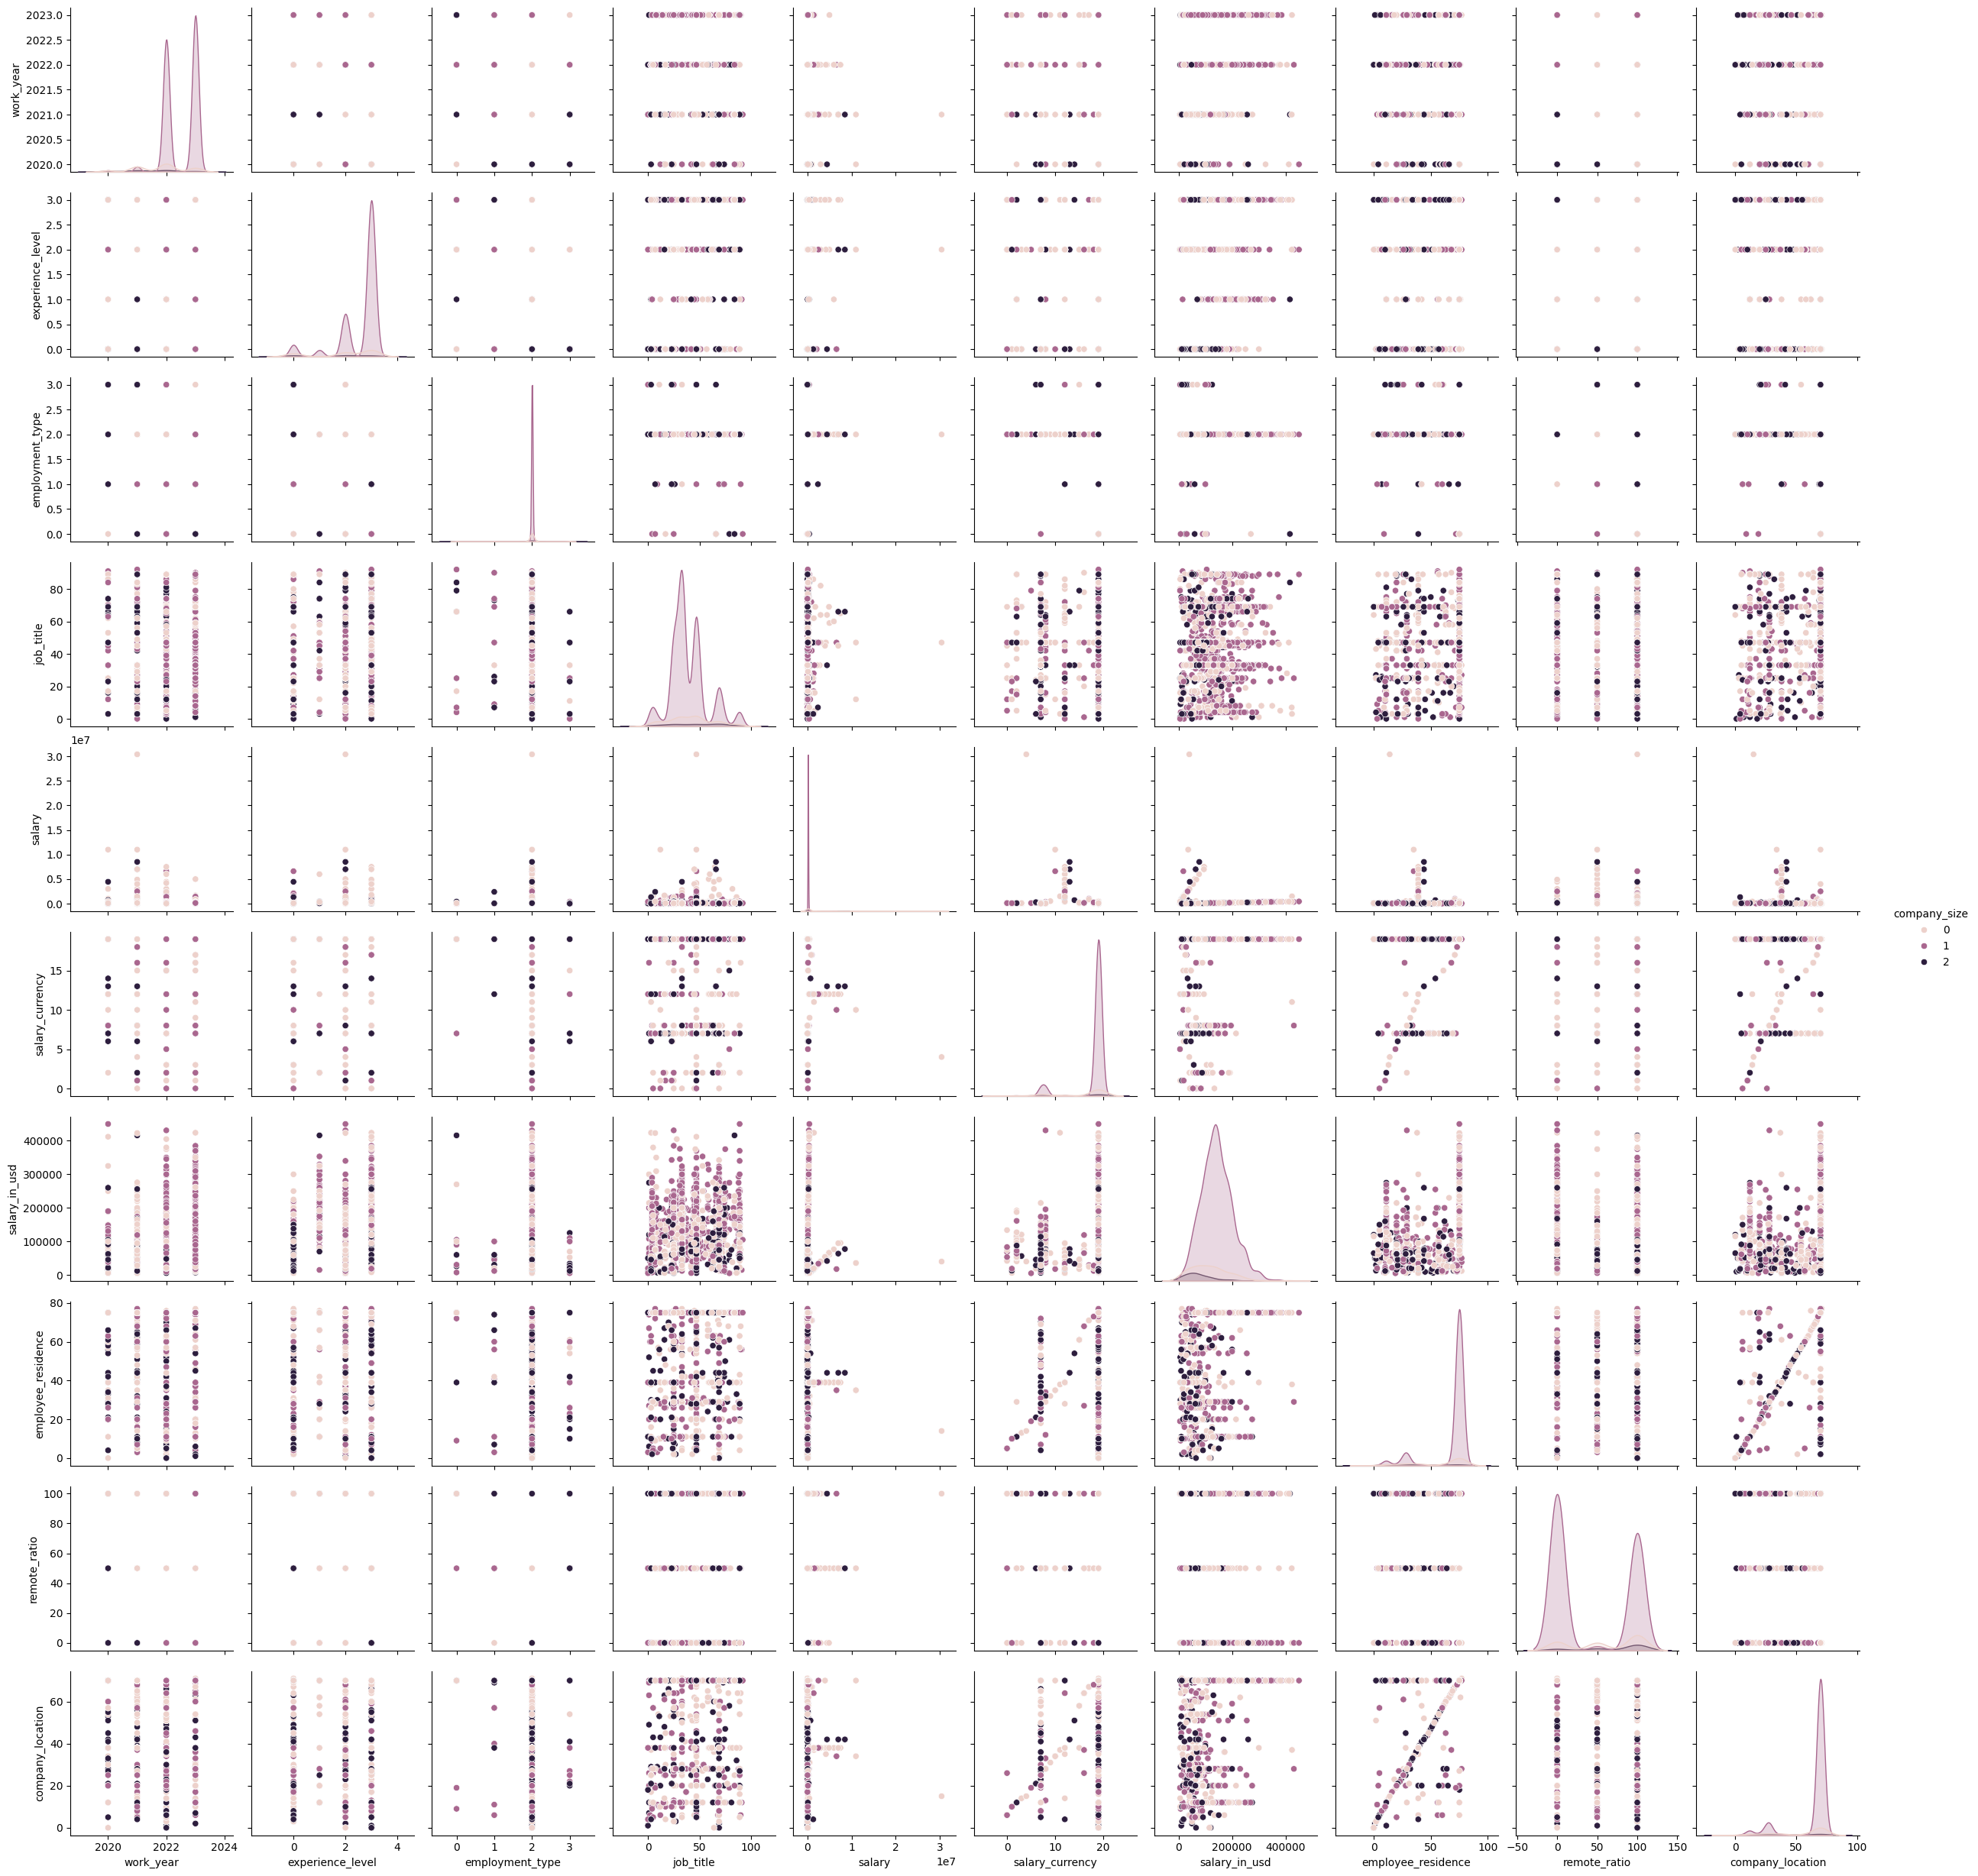

In [26]:
sns.pairplot(df , hue='company_size')

# Split Data into Train & Test

In [27]:
x=df.drop('company_size' , axis=1)
y=df['company_size']

In [28]:
x

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location
0,2023,3,2,84,80000,7,85847,26,100,25
1,2023,2,0,66,30000,19,30000,75,100,70
2,2023,2,0,66,25500,19,25500,75,100,70
3,2023,3,2,47,175000,19,175000,11,100,12
4,2023,3,2,47,120000,19,120000,11,100,12
...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,19,412000,75,100,70
3751,2021,2,2,84,151000,19,151000,75,100,70
3752,2020,0,2,47,105000,19,105000,75,100,70
3753,2020,0,0,17,100000,19,100000,75,100,70


In [29]:
y

0       0
1       2
2       2
3       1
4       1
       ..
3750    0
3751    0
3752    2
3753    0
3754    0
Name: company_size, Length: 3755, dtype: int32

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , train_size=0.3 , random_state=42)

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# "Now, we will measure the accuracy of various models."



In [32]:
models = {
    'Linear_Regression':LinearRegression(),
    'KNN':KNeighborsRegressor(n_neighbors = 10),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'XGB':XGBRegressor(),
    'SVM':SVC()
}

In [39]:
for i in models :
    obj=models[i]
    obj.fit(x_train , y_train)
    obj_pred=obj.predict(x_test)
    obj_pred = obj_pred > 0.5
    accuracy=accuracy_score(y_test , obj_pred)
    mse = mean_squared_error(y_test, obj_pred)
    r2 = r2_score(y_test,obj_pred)
    print('mean_squared_error of '+i+':',mse)
    print('accuracy of '+i+':',accuracy)
    print('r2_score of '+i+':',r2)




mean_squared_error of Linear_Regression: 0.16127805249144161
accuracy of Linear_Regression: 0.8410041841004184
r2_score of Linear_Regression: -0.052744114358245664
mean_squared_error of KNN: 0.15709395207303156
accuracy of KNN: 0.8531761125903385
r2_score of KNN: -0.02543235667442323
mean_squared_error of DecisionTree: 0.20311905667554203
accuracy of DecisionTree: 0.8413845568657284
r2_score of DecisionTree: -0.3258616911964698
mean_squared_error of RandomForest: 0.1502472422974515
accuracy of RandomForest: 0.8588817040699885
r2_score of RandomForest: 0.019259610444558817
mean_squared_error of XGB: 0.17306960821605172
accuracy of XGB: 0.8588817040699885
r2_score of XGB: -0.12971361328538156
mean_squared_error of SVM: 0.18257892734880182
accuracy of SVM: 0.8619246861924686
r2_score of SVM: -0.19178578983952344


In [41]:
from tabulate import tabulate

results = [
    ["Model", "Mean Squared Error", "Accuracy", "R^2 Score"],
    ["Linear Regression", 0.1613, 0.8410, -0.0527],
    ["KNN", 0.1571, 0.8532, -0.0254],
    ["Decision Tree", 0.2031, 0.8414, -0.3259],
    ["Random Forest", 0.1502, 0.8589, 0.0193],
    ["XGBoost", 0.1731, 0.8589, -0.1297],
    ["SVM", 0.1826, 0.8619, -0.1918]
]

print(tabulate(results, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════════╤══════════════════════╤════════════╤═════════════╕
│ Model             │   Mean Squared Error │   Accuracy │   R^2 Score │
╞═══════════════════╪══════════════════════╪════════════╪═════════════╡
│ Linear Regression │               0.1613 │     0.841  │     -0.0527 │
├───────────────────┼──────────────────────┼────────────┼─────────────┤
│ KNN               │               0.1571 │     0.8532 │     -0.0254 │
├───────────────────┼──────────────────────┼────────────┼─────────────┤
│ Decision Tree     │               0.2031 │     0.8414 │     -0.3259 │
├───────────────────┼──────────────────────┼────────────┼─────────────┤
│ Random Forest     │               0.1502 │     0.8589 │      0.0193 │
├───────────────────┼──────────────────────┼────────────┼─────────────┤
│ XGBoost           │               0.1731 │     0.8589 │     -0.1297 │
├───────────────────┼──────────────────────┼────────────┼─────────────┤
│ SVM               │               0.1826 │     0.8619 │     -0

#  Cross Validation on SVM Model

In [43]:
params = {
    'kernel' : ['linear', 'rbf', 'poly'],
    'C' : [1.0, 0.1, 0.01],
}

In [45]:
svm=SVC()
svm.fit(x_train , y_train)

SVC()

In [46]:
gridsearch=GridSearchCV(svm , params , cv=5)
gridsearch.fit(x_train , y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)


{'C': 1.0, 'kernel': 'rbf'}
0.8525703048180924


In [47]:
svm = SVC(C= 1.0, kernel= 'rbf')
svm.fit(x_train , y_train)

SVC()

In [48]:
svm_pred = svm.predict(x_test)
print(classification_report(y_test , svm_pred))

              precision    recall  f1-score   support

           0       0.56      0.28      0.37       320
           1       0.88      0.99      0.93      2208
           2       0.44      0.04      0.07       101

    accuracy                           0.86      2629
   macro avg       0.63      0.43      0.46      2629
weighted avg       0.83      0.86      0.83      2629

